### Homework 9b
#### Mouselinos Spyridon
#### March 2020
****

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
Dataset_b = sio.loadmat('HW9b.mat')

train_x_b = Dataset_b['train_X']
train_y_b = Dataset_b['train_y']
test_x_b = Dataset_b['test_X']
test_y_b = Dataset_b['test_y']

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


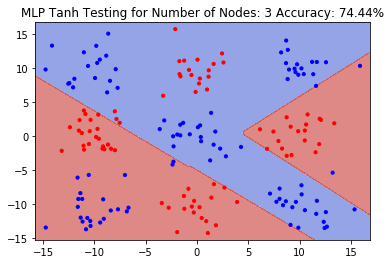

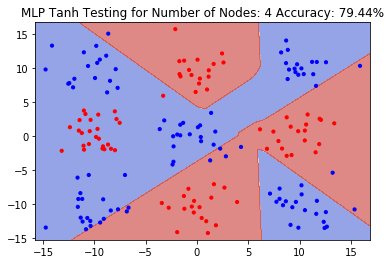

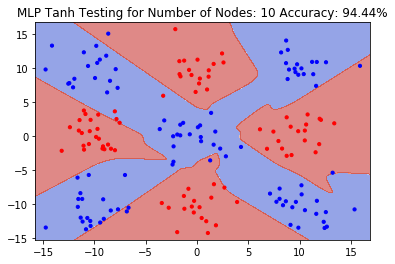

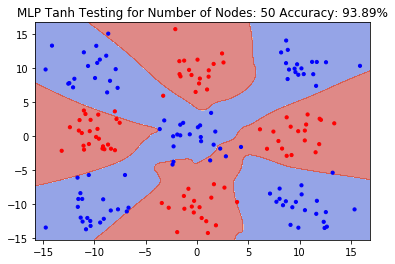

In [3]:
nodes = [3, 4, 10, 50]
for nodeset in nodes:
    clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=nodeset, random_state=666, activation='tanh')
    ### Fit on Training Set
    clf.fit(train_x_b, train_y_b.reshape(180))
    ### Collect Results and Plot On Test Set.
    X00, X11 = test_x_b[:,0], test_x_b[:,1]
    xx, yy = make_meshgrid(X00, X11)
    fig, ax= plt.subplots(1, 1)
    color= ['red' if l == 1 else 'blue' for l in test_y_b.reshape(180)]
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
    predictions = clf.predict(test_x_b)
    ax.title.set_text("MLP Tanh Testing for Number of Nodes: {} Accuracy: {}%".format(nodeset,round(100 * accuracy_score(test_y_b.reshape(180), predictions),2)))
    ax.scatter(X00, X11, c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
    plt.show()
    plt.close()

### Comments on the exersize
***
* As we can see the use of a single hidden layer can solve the problem quite good.
* As the number of nodes increases, so does the accuracy score on the test set.
* The best approach is with parameter nodes=10  with accurancy 94.44%.
* Large Node Size can ( and in our case did ) cause overfitting so we need to get our results from the test set only as we performed above.
* @50 nodes the model showed worse performance than with 10 nodes meaning that a value around 10 - 50 would be the optimal number of nodes to choose .